In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('/Users/dylanbai/Downloads/credit_record.csv')

In [4]:
df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
df.describe(include='all')

,ID,MONTHS_BALANCE,STATUS
count,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,442031
mean,5.068286e+06,-1.913700e+01,NaN
std,4.615058e+04,1.402350e+01,NaN
min,5.001711e+06,-6.000000e+01,NaN
25%,5.023644e+06,-2.900000e+01,NaN
50%,5.062104e+06,-1.700000e+01,NaN
75%,5.113856e+06,-7.000000e+00,NaN


In [7]:
df.groupby('STATUS').count()

,ID,MONTHS_BALANCE
STATUS,,
0,383120,383120
1,11090,11090
2,868,868
3,320,320
4,223,223
5,1693,1693
C,442031,442031
X,209230,209230


In [8]:
df2 = pd.read_csv('/Users/dylanbai/Downloads/application_record.csv')

In [9]:
df2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
df_new=df2.merge(df,on='ID',how='inner')

In [12]:
print(df_new.shape)

(777715, 20)


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [14]:
df_new.groupby('OCCUPATION_TYPE')['ID'].count()

OCCUPATION_TYPE
Accountants               27223
Cleaning staff            11399
Cooking staff             13416
Core staff                77112
Drivers                   47678
HR staff                   1686
High skill tech staff     31768
IT staff                   1319
Laborers                 131572
Low-skill Laborers         3623
Managers                  67738
Medicine staff            26691
Private service staff      6714
Realty agents              1260
Sales staff               70362
Secretaries                3149
Security staff            12400
Waiters/barmen staff       2557
Name: ID, dtype: int64

In [15]:
df_new=df_new.fillna('Laborers')

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [17]:
df_new.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [18]:
df_new.groupby('STATUS').count()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
STATUS,,,,,,,,,,,,,,,,,,,
0,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654,290654
1,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747,8747
2,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801
3,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286
4,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
5,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527
C,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536,329536
X,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950,145950


In [19]:
mapping = {'0':0, '1':0, '2':0, '3':0, '4':0, '5':0,'C':1,'X':1}
df_new['STATUS_NEW'] = df_new['STATUS'].map(mapping)

<Axes: xlabel='STATUS_NEW', ylabel='Count'>

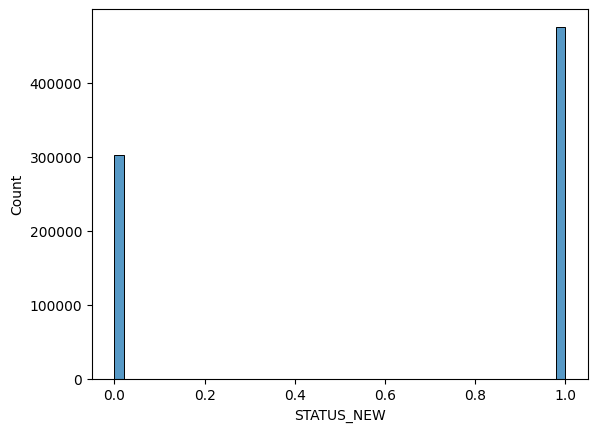

In [20]:
sns.histplot(x='STATUS_NEW', data=df_new)

<Axes: ylabel='AMT_INCOME_TOTAL'>

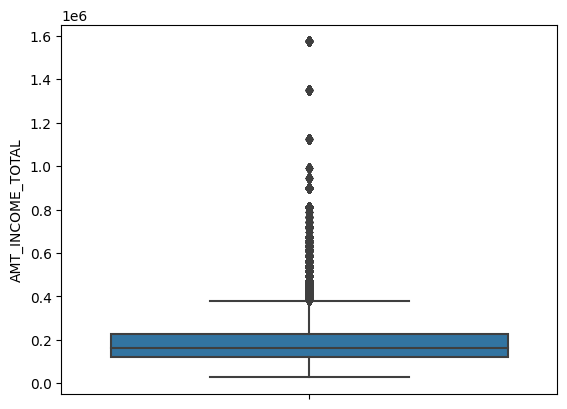

In [21]:
sns.boxplot(data=df_new,y='AMT_INCOME_TOTAL')


<Axes: ylabel='DAYS_EMPLOYED'>

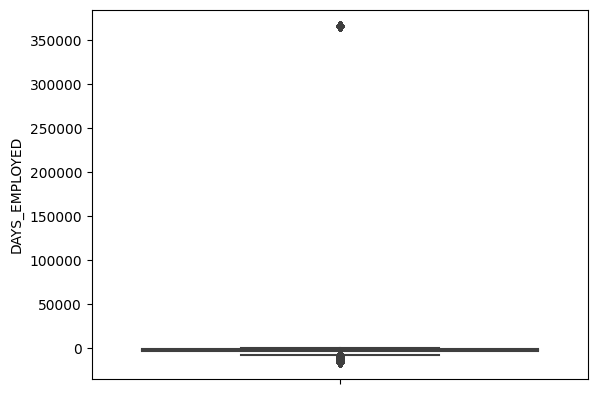

In [22]:
sns.boxplot(data=df_new,y='DAYS_EMPLOYED')


<Axes: ylabel='CNT_FAM_MEMBERS'>

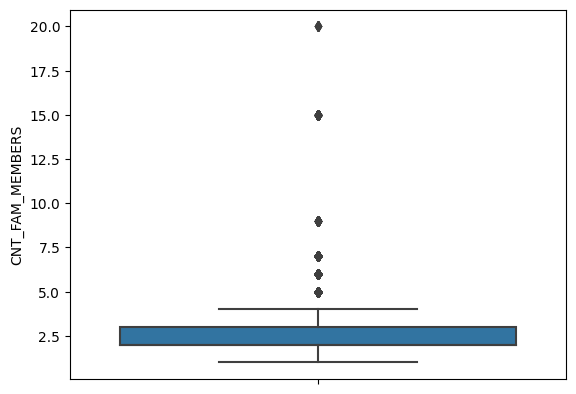

In [23]:
sns.boxplot(data=df_new,y='CNT_FAM_MEMBERS')

In [24]:
AMT_INCOME_TOTAL_outliers=df_new[df_new['AMT_INCOME_TOTAL']>800000].index

In [25]:
DAYS_EMPLOYED_outliers=df_new[df_new['DAYS_EMPLOYED']>300000].index

In [26]:
CNT_FAM_MEMBERS_outliers=df_new[df_new['CNT_FAM_MEMBERS']>7.5].index

In [27]:
df_new.drop(AMT_INCOME_TOTAL_outliers,inplace=True)

In [28]:
df_new.drop(DAYS_EMPLOYED_outliers,inplace=True)

In [29]:
df_new.drop(CNT_FAM_MEMBERS_outliers,inplace=True)

<Axes: xlabel='STATUS_NEW', ylabel='CNT_FAM_MEMBERS'>

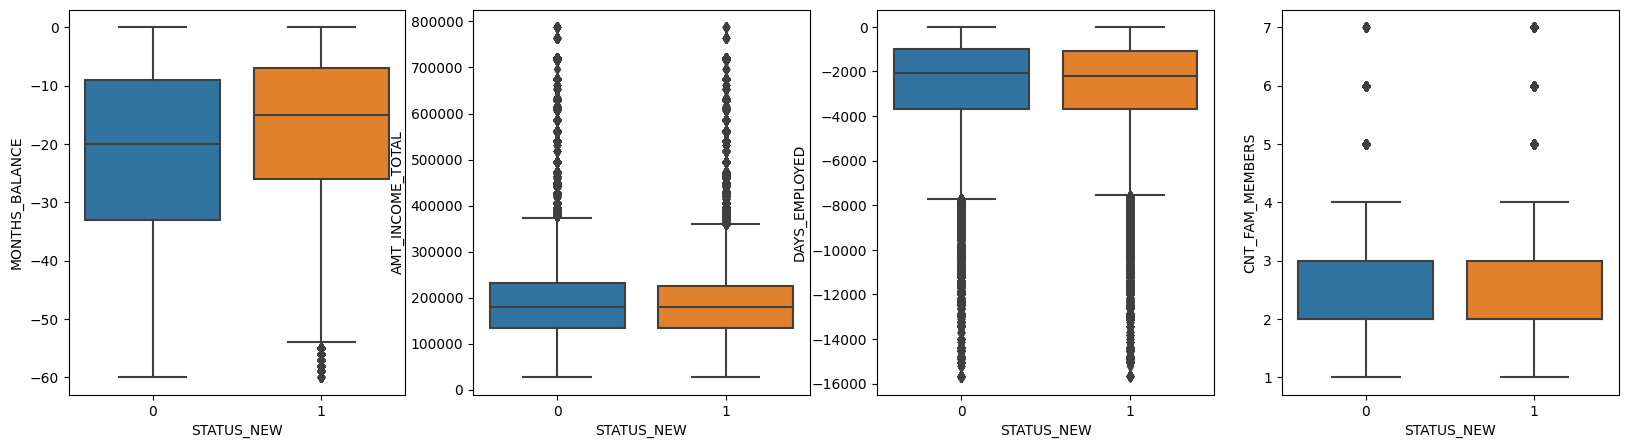

In [30]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(20,5))
sns.boxplot(x='STATUS_NEW',y='MONTHS_BALANCE', data=df_new, ax=ax1)
sns.boxplot(x='STATUS_NEW',y='AMT_INCOME_TOTAL',data=df_new, ax=ax2)
sns.boxplot(x='STATUS_NEW',y='DAYS_EMPLOYED', data=df_new, ax=ax3)
sns.boxplot(x='STATUS_NEW',y='CNT_FAM_MEMBERS', data=df_new, ax=ax4)

In [31]:
df_new.groupby(['CODE_GENDER','STATUS_NEW'])['ID'].count().unstack()

STATUS_NEW,0,1
CODE_GENDER,,
F,159634,249732
M,92399,146245


In [32]:
df_new.groupby(['FLAG_OWN_CAR','STATUS_NEW'])['ID'].count().unstack()

STATUS_NEW,0,1
FLAG_OWN_CAR,,
N,145694,227239
Y,106339,168738


In [33]:
df_new.groupby(['FLAG_OWN_REALTY','STATUS_NEW'])['ID'].count().unstack()

STATUS_NEW,0,1
FLAG_OWN_REALTY,,
N,90653,142817
Y,161380,253160


In [34]:
df_new.groupby(['NAME_INCOME_TYPE','STATUS_NEW'])['ID'].count().unstack()

STATUS_NEW,0,1
NAME_INCOME_TYPE,,
Commercial associate,72046,110454
Pensioner,225,195
State servant,25506,39792
Student,68,269
Working,154188,245267


In [35]:
df_new.groupby(['NAME_EDUCATION_TYPE','STATUS_NEW'])['ID'].count().unstack()

STATUS_NEW,0,1
NAME_EDUCATION_TYPE,,
Academic degree,199,620
Higher education,71932,118684
Incomplete higher,11369,17622
Lower secondary,1771,3416
Secondary / secondary special,166762,255635


In [36]:
df_new.groupby(['NAME_HOUSING_TYPE','STATUS_NEW'])['ID'].count().unstack()

STATUS_NEW,0,1
NAME_HOUSING_TYPE,,
Co-op apartment,1202,2264
House / apartment,223153,349589
Municipal apartment,7993,13036
Office apartment,1891,3021
Rented apartment,3903,6326
With parents,13891,21741


In [37]:
df_new.groupby(['FLAG_EMAIL','STATUS_NEW'])['ID'].count().unstack()

STATUS_NEW,0,1
FLAG_EMAIL,,
0,225340,356393
1,26693,39584


In [38]:
#From the graph，the month_balance,cnt_fam_members,code_gender,name_income_type,name_education_type,name_housing_type has some influences on the target varaible.

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648010 entries, 0 to 777714
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   648010 non-null  int64  
 1   CODE_GENDER          648010 non-null  object 
 2   FLAG_OWN_CAR         648010 non-null  object 
 3   FLAG_OWN_REALTY      648010 non-null  object 
 4   CNT_CHILDREN         648010 non-null  int64  
 5   AMT_INCOME_TOTAL     648010 non-null  float64
 6   NAME_INCOME_TYPE     648010 non-null  object 
 7   NAME_EDUCATION_TYPE  648010 non-null  object 
 8   NAME_FAMILY_STATUS   648010 non-null  object 
 9   NAME_HOUSING_TYPE    648010 non-null  object 
 10  DAYS_BIRTH           648010 non-null  int64  
 11  DAYS_EMPLOYED        648010 non-null  int64  
 12  FLAG_MOBIL           648010 non-null  int64  
 13  FLAG_WORK_PHONE      648010 non-null  int64  
 14  FLAG_PHONE           648010 non-null  int64  
 15  FLAG_EMAIL           6

In [40]:
cat_columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE']

In [41]:
X=df_new.iloc[:,:19]
Y=df_new.iloc[:,20]

In [42]:
Y[Y==1].count()

395977

In [43]:
Y[Y==0].count()

252033

In [44]:
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)

In [45]:
X_encoded

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,2.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,5008804,0,427500.0,-12005,-4542,2.0,-1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,5008804,0,427500.0,-12005,-4542,2.0,-2,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,5008804,0,427500.0,-12005,-4542,2.0,-3,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,5008804,0,427500.0,-12005,-4542,2.0,-4,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,-9188,-1193,1.0,-9,0,1,1,...,1,0,0,0,0,0,0,0,0,0
777711,5150337,0,112500.0,-9188,-1193,1.0,-10,0,1,1,...,1,0,0,0,0,0,0,0,0,0
777712,5150337,0,112500.0,-9188,-1193,1.0,-11,0,1,1,...,1,0,0,0,0,0,0,0,0,0
777713,5150337,0,112500.0,-9188,-1193,1.0,-12,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [46]:
X_encoded.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Ma

In [47]:
log = LogisticRegression(max_iter=3000)
log.fit(X_encoded[['CODE_GENDER_F', 'CODE_GENDER_M',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow','MONTHS_BALANCE','CNT_FAM_MEMBERS']], Y)

LogisticRegression(max_iter=3000)

In [48]:
pred = log.predict(X_encoded[['CODE_GENDER_F', 'CODE_GENDER_M',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow','MONTHS_BALANCE','CNT_FAM_MEMBERS']])

In [49]:
print(accuracy_score(Y,pred))
print(f1_score(Y,pred))
print(precision_score(Y,pred))
print(recall_score(Y,pred))

0.6267248962207373
0.7523618613146159
0.6326552398006181
0.9279402591564662


In [50]:
print(classification_report(Y,pred))

              precision    recall  f1-score   support

           0       0.58      0.15      0.24    252033
           1       0.63      0.93      0.75    395977

    accuracy                           0.63    648010
   macro avg       0.60      0.54      0.50    648010
weighted avg       0.61      0.63      0.55    648010



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded[['CODE_GENDER_F', 'CODE_GENDER_M',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow','MONTHS_BALANCE','CNT_FAM_MEMBERS']], Y, random_state=123)

In [52]:
log = LogisticRegression(max_iter=3000)
nb = GaussianNB()
knn = KNeighborsClassifier()


In [53]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [56]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)

In [57]:
print(f1_score(y_test,pred_l))
print(f1_score(y_test,pred_nb))
print(f1_score(y_test,pred_knn))

0.7528025047578121
0.5089839758765918
0.678658625851818


In [83]:
print(accuracy_score(y_test,pred_l))
print(accuracy_score(y_test,pred_nb))
print(accuracy_score(y_test,pred_knn))

0.6271735708597989
0.5135151818176207
0.5799769140077653


In [84]:
print(precision_score(y_test,pred_l))
print(precision_score(y_test,pred_nb))
print(precision_score(y_test,pred_knn))

0.6328697555034097
0.6642815325570806
0.6373595181706094


In [85]:
print(recall_score(y_test,pred_l))
print(recall_score(y_test,pred_nb))
print(recall_score(y_test,pred_knn))

0.9288195847135816
0.41253938757372544
0.7256806980689989


In [58]:
pred_l_prob = log.predict_proba(X_test)

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])

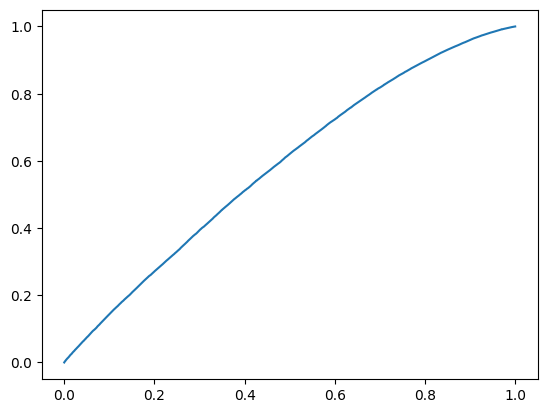

In [60]:
plt.plot(fpr, tpr)

In [61]:
gmeans = np.sqrt(tpr*(1-fpr))

In [62]:
thresholds[np.argmax(gmeans)] 

0.6178550926389352

In [79]:
y_pred_new = []
for i in pred_l_prob[:,1]:
  if i < 0.60:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

In [80]:
print(f1_score(y_test,y_pred_new))

0.6583748010811084


In [81]:
fpr, tpr, tresholds = roc_curve(y_test,y_pred_new)

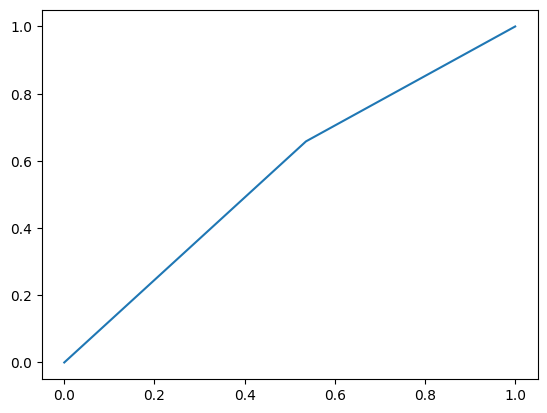

In [82]:
plt.plot(fpr,tpr)

In [108]:
params_knn = {'n_neighbors': list(range(1,50)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

In [109]:
knn = KNeighborsClassifier()

In [112]:
gridsearch_knn = GridSearchCV(knn, params_knn, cv=5, scoring='f1')

In [113]:
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=5, n_iter = 100, scoring='f1')

In [114]:
gridsearch_knn.fit(X_train, y_train)
randomsearch_knn.fit(X_train, y_train)


In [54]:
#df_new=df_new.dropna()

In [55]:
#df_new.info()